# Covid 19 Data Analysis

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime
import warnings
warnings.filterwarnings('ignore')

In [73]:
covid_df = pd.read_csv('covid_19_india.csv')

In [74]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,2020-01-30,6:00 PM,Kerala,1,0,0,0,1
1,2,2020-01-31,6:00 PM,Kerala,1,0,0,0,1
2,3,2020-02-01,6:00 PM,Kerala,2,0,0,0,2
3,4,2020-02-02,6:00 PM,Kerala,3,0,0,0,3
4,5,2020-02-03,6:00 PM,Kerala,3,0,0,0,3
5,6,2020-02-04,6:00 PM,Kerala,3,0,0,0,3
6,7,2020-02-05,6:00 PM,Kerala,3,0,0,0,3
7,8,2020-02-06,6:00 PM,Kerala,3,0,0,0,3
8,9,2020-02-07,6:00 PM,Kerala,3,0,0,0,3
9,10,2020-02-08,6:00 PM,Kerala,3,0,0,0,3


In [75]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18110 entries, 0 to 18109
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       18110 non-null  int64 
 1   Date                      18110 non-null  object
 2   Time                      18110 non-null  object
 3   State/UnionTerritory      18110 non-null  object
 4   ConfirmedIndianNational   18110 non-null  object
 5   ConfirmedForeignNational  18110 non-null  object
 6   Cured                     18110 non-null  int64 
 7   Deaths                    18110 non-null  int64 
 8   Confirmed                 18110 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 1.2+ MB


In [76]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,18110.000000,1.811000e+04,18110.000000,1.811000e+04
mean,9055.500000,2.786375e+05,4052.402264,3.010314e+05
std,5228.051023,6.148909e+05,10919.076411,6.561489e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,4528.250000,3.360250e+03,32.000000,4.376750e+03
50%,9055.500000,3.336400e+04,588.000000,3.977350e+04
75%,13582.750000,2.788698e+05,3643.750000,3.001498e+05
max,18110.000000,6.159676e+06,134201.000000,6.363442e+06


In [77]:
vaccine_df = pd.read_csv('covid_vaccine_statewise.csv')

In [78]:
covid_df.columns

Index(['Sno', 'Date', 'Time', 'State/UnionTerritory',
       'ConfirmedIndianNational', 'ConfirmedForeignNational', 'Cured',
       'Deaths', 'Confirmed'],
      dtype='object')

In [79]:
covid_df.drop(['Sno','ConfirmedIndianNational','Time','ConfirmedForeignNational'],inplace=True, axis=1)

In [80]:
covid_df.columns

Index(['Date', 'State/UnionTerritory', 'Cured', 'Deaths', 'Confirmed'], dtype='object')

In [81]:
covid_df.head(3)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0,0,1
1,2020-01-31,Kerala,0,0,1
2,2020-02-01,Kerala,0,0,2


In [82]:
# Active Cases

covid_df['Active_Cases'] = covid_df['Confirmed'] - (covid_df['Cured'] - covid_df['Deaths'])
covid_df.tail()

,Date,State/UnionTerritory,Cured,Deaths,Confirmed,Active_Cases
18105,2021-08-11,Telangana,638410,3831,650353,15774
18106,2021-08-11,Tripura,77811,773,80660,3622
18107,2021-08-11,Uttarakhand,334650,7368,342462,15180
18108,2021-08-11,Uttar Pradesh,1685492,22775,1708812,46095
18109,2021-08-11,West Bengal,1506532,18252,1534999,46719


In [83]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'], format='%Y-%m-%d')

In [84]:
statewise = pd.pivot_table(covid_df, index = 'State/UnionTerritory', values = ['Confirmed', 'Deaths', 'Cured'], aggfunc = max)

In [85]:
statewise.head()

,Confirmed,Cured,Deaths
State/UnionTerritory,,,
Andaman and Nicobar Islands,7548,7412,129
Andhra Pradesh,1985182,1952736,13564
Arunachal Pradesh,50605,47821,248
Assam,576149,559684,5420
Bihar,725279,715352,9646


In [86]:
statewise['Recovery Rate'] = statewise['Cured']*100 / statewise['Confirmed']

In [87]:
statewise['Morality Rate'] = statewise['Deaths']*100 / statewise['Confirmed']

In [88]:
statewise = statewise.sort_values(by='Confirmed', ascending=False)

In [89]:
statewise.style.background_gradient(cmap = 'cubehelix')

,Confirmed,Cured,Deaths,Recovery Rate,Morality Rate
State/UnionTerritory,,,,,
Maharashtra,6363442,6159676,134201,96.797865,2.108937
Maharashtra***,6229596,6000911,130753,96.329056,2.098900
Kerala,3586693,3396184,18004,94.688450,0.501967
Karnataka,2921049,2861499,36848,97.961349,1.261465
Karanataka,2885238,2821491,36197,97.790581,1.254559
Tamil Nadu,2579130,2524400,34367,97.877967,1.332504
Andhra Pradesh,1985182,1952736,13564,98.365591,0.683262
Uttar Pradesh,1708812,1685492,22775,98.635309,1.332797
West Bengal,1534999,1506532,18252,98.145471,1.189056


In [90]:
# Top 10 active cases states

top_10_active_cases = covid_df.groupby('State/UnionTerritory').max()[['Active_Cases','Date']].sort_values(by='Active_Cases', ascending=False).reset_index()

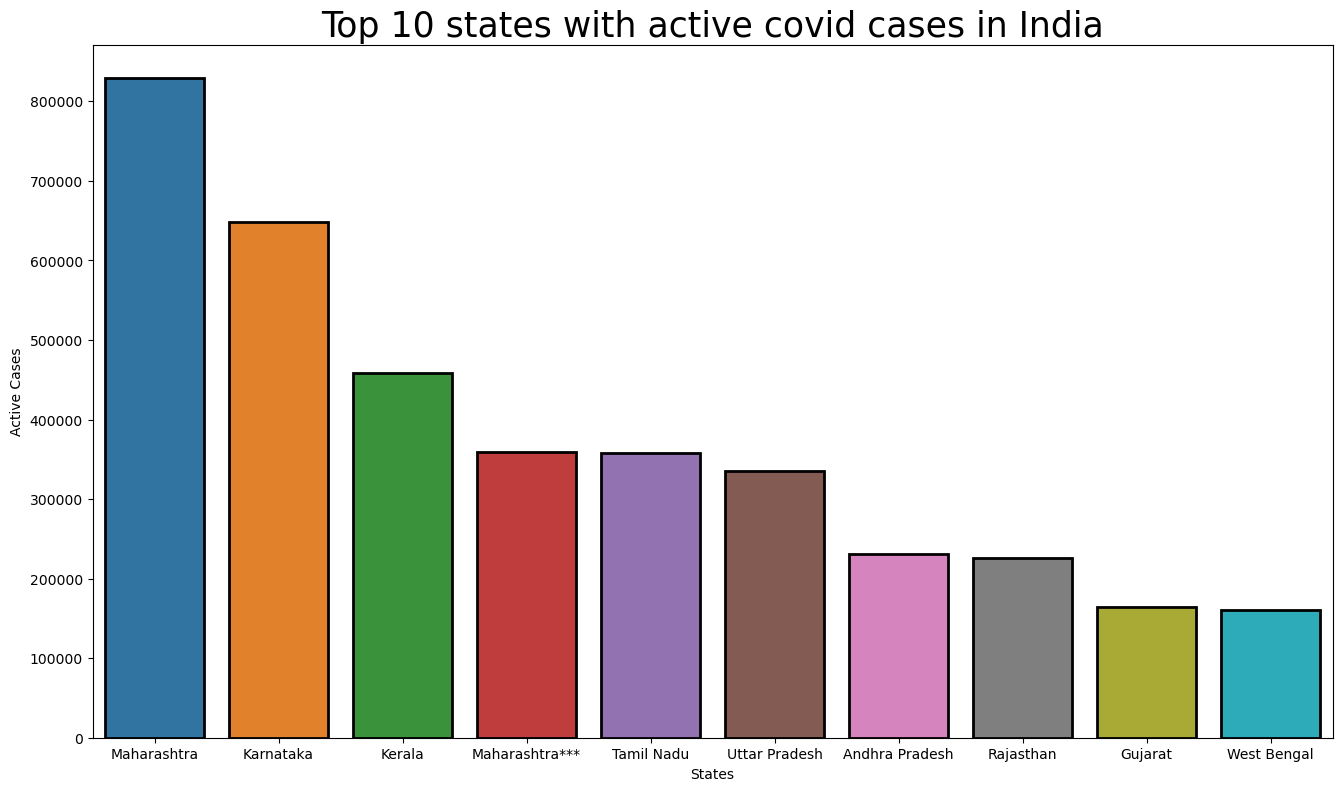

In [91]:
plt.figure(figsize=(16,9))
plt.title('Top 10 states with active covid cases in India', size=25)
ax = sns.barplot(top_10_active_cases.iloc[:10], x='State/UnionTerritory', y='Active_Cases', linewidth=2, edgecolor='black')
plt.xlabel('States')
plt.ylabel('Active Cases')
plt.show()

In [92]:
# Top states with highest death

top_10_deaths = covid_df.groupby('State/UnionTerritory').max()[['Deaths','Date']].sort_values(by='Deaths', ascending=False).reset_index()

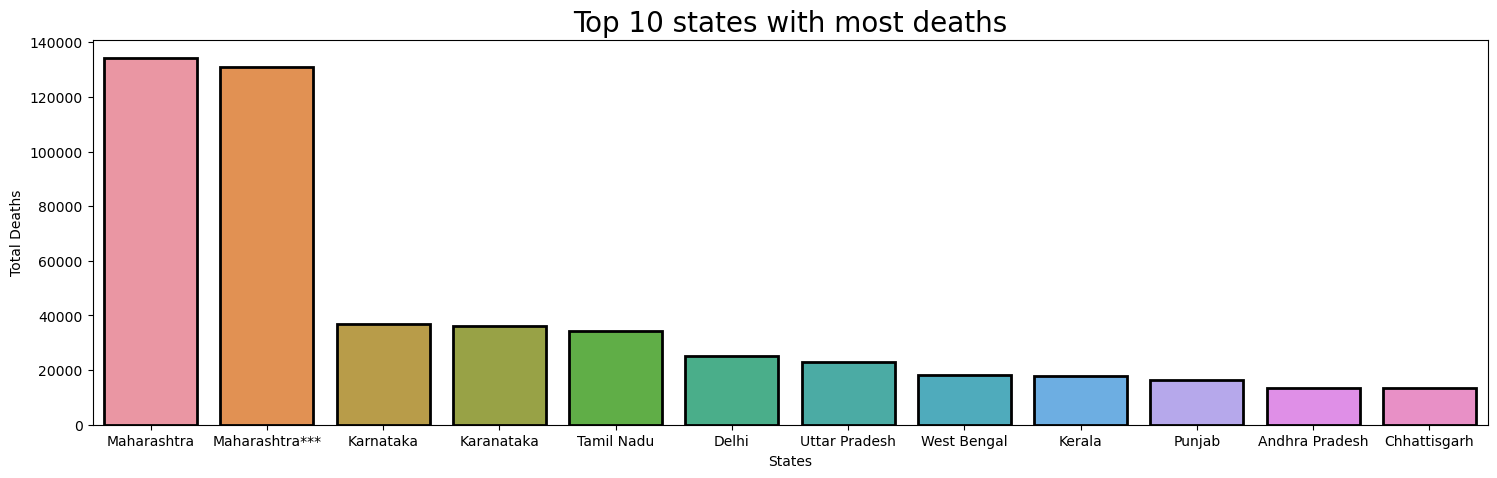

In [93]:
plt.figure(figsize=(18,5))
sns.barplot(top_10_deaths.iloc[:12], x = 'State/UnionTerritory', y = 'Deaths', linewidth=2, edgecolor='black')
plt.title('Top 10 states with most deaths', size=20)
plt.xlabel('States')
plt.ylabel('Total Deaths')
plt.show()

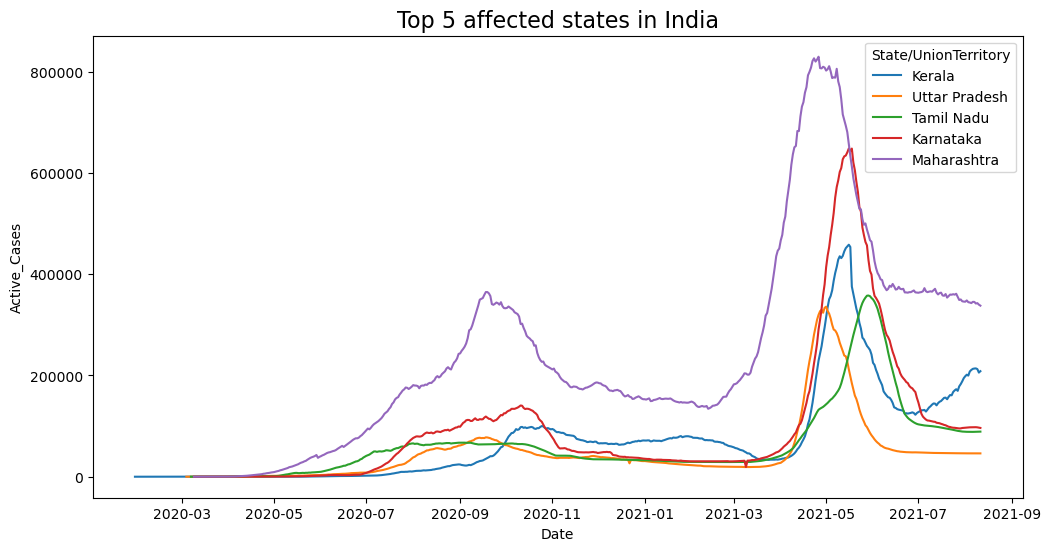

In [94]:
plt.figure(figsize=(12,6))
ax = sns.lineplot(covid_df[covid_df['State/UnionTerritory'].isin(['Maharashtra', 'Karnataka', 'Tamil Nadu', 'Uttar Pradesh', 'Kerala'])], 
                 x= 'Date', y='Active_Cases', hue='State/UnionTerritory')
ax.set_title('Top 5 affected states in India', size=16)
plt.show()

In [95]:
vaccine_df.head()

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [96]:
vaccine_df.rename(columns = {'Updated On' : 'Vaccine_Date'}, inplace = True)

In [97]:
vaccine_df.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [98]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

In [99]:
vaccine_df.isnull().sum()

Vaccine_Date                              0
State                                     0
Total Doses Administered                224
Sessions                                224
 Sites                                  224
First Dose Administered                 224
Second Dose Administered                224
Male (Doses Administered)               384
Female (Doses Administered)             384
Transgender (Doses Administered)        384
 Covaxin (Doses Administered)           224
CoviShield (Doses Administered)         224
Sputnik V (Doses Administered)         4850
AEFI                                   2407
18-44 Years (Doses Administered)       6143
45-60 Years (Doses Administered)       6143
60+ Years (Doses Administered)         6143
18-44 Years(Individuals Vaccinated)    4112
45-60 Years(Individuals Vaccinated)    4111
60+ Years(Individuals Vaccinated)      4111
Male(Individuals Vaccinated)           7685
Female(Individuals Vaccinated)         7685
Transgender(Individuals Vaccinat

In [100]:
vaccination = vaccine_df.drop(['Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], axis=1)

In [101]:
vaccination.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


In [102]:
# Male vs Female vaccination

male = vaccination['Male(Individuals Vaccinated)'].sum()
female = vaccination['Female(Individuals Vaccinated)'].sum()

In [103]:
px.pie(names=['Male', 'Female'], values=[male,female], title='Male vs Female vaccination')

In [104]:
vaccine = vaccine_df[vaccine_df['State'] != 'India']

In [105]:
vaccine

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7840,11/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7841,12/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7842,13/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7843,14/08/2021,West Bengal,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [106]:
vaccine.rename(columns = {'Total Individuals Vaccinated' : 'Total'}, inplace=True)

In [107]:
vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,124.0


In [108]:
max_vac = vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vac = max_vac.sort_values('Total', ascending = False)[:5]
max_vac

,Total
State,
Maharashtra,1.403075e+09
Uttar Pradesh,1.200575e+09
Rajasthan,1.141163e+09
Gujarat,1.078261e+09
West Bengal,9.250227e+08


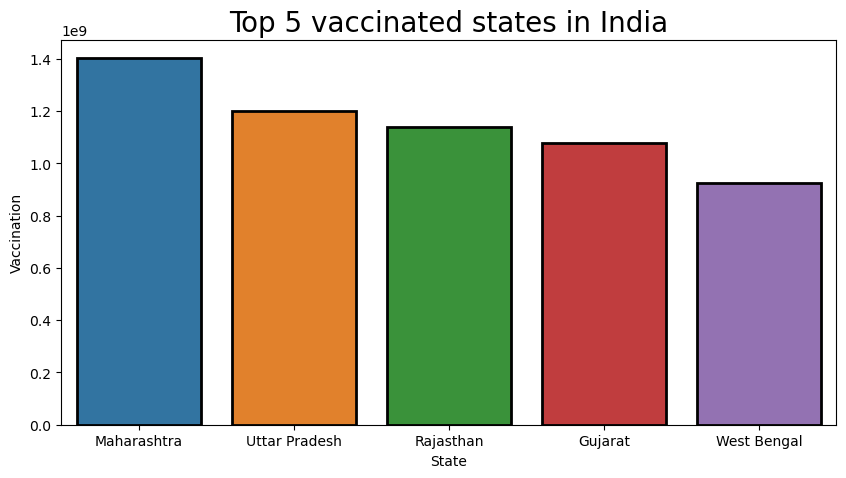

In [109]:
plt.figure(figsize = (10,5))
plt.title('Top 5 vaccinated states in India', size=20)
sns.barplot(data=max_vac, x = max_vac.index, y = max_vac['Total'], linewidth=2, edgecolor='black')
plt.xlabel('State')
plt.ylabel('Vaccination')
plt.show()

In [119]:
# least number of vaccinated individuals

min_vac_people = vaccine.groupby('State')['Total'].sum().to_frame('Total')
min_vac_people = min_vac_people.sort_values('Total', ascending= False).tail(5)
min_vac_people

,Total
State,
Sikkim,16136752.0
Dadra and Nagar Haveli and Daman and Diu,11358600.0
Ladakh,9466289.0
Andaman and Nicobar Islands,8102125.0
Lakshadweep,2124715.0


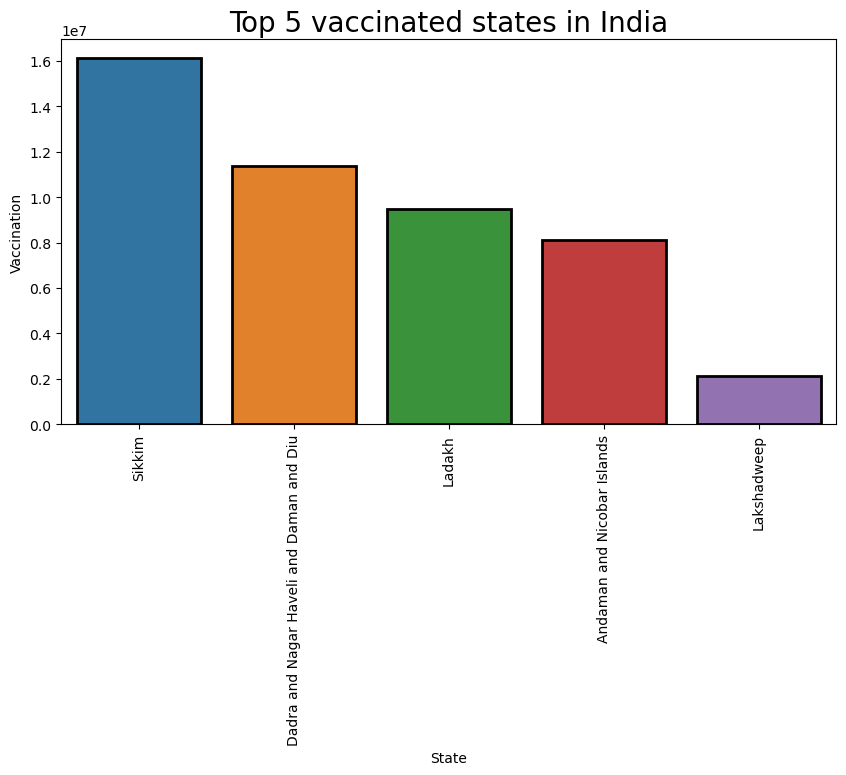

In [121]:
plt.figure(figsize = (10,5))
plt.title('Top 5 vaccinated states in India', size=20)
sns.barplot(data=min_vac_people, x = min_vac_people.index, y = min_vac_people['Total'], linewidth=2, edgecolor='black')
plt.xlabel('State')
plt.ylabel('Vaccination')
plt.xticks(rotation=90)
plt.show()